### 추천시스템의 구조
추천시스템의 전체적인 구조는 후보를 생성하는 단계와 랭킹을 매기는 단계로 구분된다.     
- 후보 생성 단계     
수백만개의 아이템 중 사용자의 활동 기록을 기반으로 후보가 될 만한 수백여개의 아이템으로 선정한다.(중요한 애들만 후보로 삼는 과정)      
이러한 후보는 일반적으로 높은 정밀도로 사용자와 관련이 있고 협업필터링을 더해준다면 개인화를 제공할 수 있다.     
리스트에서 최상의 후보를 뽑으려면 recall이 높은 후보 간 상대적 중요성을 구분하기 위해 세밀한 수준의 표현이 필요하다.     
- 랭킹을 매기는 단계     
아이템과 사용자를 설명하는 Feature를 사용해서 원하는 목적 함수에 따라 각 아이템에 점수를 할당, 가장 높은 점수를 받은 아이템부터 순위가 매겨져 사용자에게 표현된다.

#### 추천시스템의 종류
추천시스템에는 크게 3가지의 종류가 있다.    
1. Contents-based Recommender System (컨텐츠 기반 추천시스템)    
- 사용자가 과거에 좋아했던 **아이템**을 파악하고 그 아이템과 **비슷한 아이템을 추천**한다.    
- 부산행을 좋아한 유저 A, 부산행의 Feature와 가장 비슷하게 닮아있는 영화가 반도라고 했을 때, 반도를 추천함    
- 1) 사용자가 과거에 접한 아이템이면서 만족한 아이템이 있어야함.
- 2) 사용자가 좋아했던 아이템 중 일부 또는 전체와 비슷한 아이템을 선정
- 3) 선정된 아이템을 유저에게 추천함    

2. Collaborative Filtering Recommender System (협업 필터링 추천 시스템)    
- **유사한 성향** 또는 취향을 가지는 **다른 사용자가 좋아한 아이템**을 현재 사용자에게 **추천**한다.   
- 부산행을 좋아한 유저 A,B. A는 부산행 말고 반도 또한 만족했다는 평가를 했을 때, 반도를 B에게 추천한다. (즉 유저-아이템에 대한 평가 매트릭스와, 유저-유저 간의 유사도가 필요하다)    
- 이런 두가지 행렬을 사용한다는 특성 때문에 협업 필터링이라고 한다.    
- 1) 사용자 A와 B 모두 같은 아이템에 비슷한 평가를 했다.
- 2) 이때 사용자 A는 다른 아이템에 평가를 내렸다. (위의 아이템과 비슷한)
- 3) 따라서 A와 B는 유사한 성향을 띄니까 다른 아이템을 B에게 추천한다.    
- Steps : 사용자 - 아이템 평가 매트릭스 -> 사용자-사용자 유사성 매트릭스(코사인, 유클리드) -> 유사한 사용자 탐색 -> 후보자 생성(유사한 사용자가 접한 아이템들의 ranking) -> 후보자 점수화 -> 후보 필터링(이미 접한 아이템 제거)    
      
협업 필터링에는 두가지 종류로 나뉜다.    
- Memory-based : 사용자가 아이템을 좋아하거나 평가했는지 또는 특정 사용자가 항목을 좋아하거나 평가했는지 와 같은 사용자의 행동을 관찰한다. 전처리 없이 raw-data에 적용할 수 있고, 구현이 쉽고 추천 결과를 설명하기 간편하다.    
Memory-based 방법은 또 2가지로 나뉜다.    
- + User-based : 사용자와 유사한 사용자가 구매/좋아요 했다는 사실을 기반으로 사용자에게 추천
- + Item-based : 사용자는 마음을 바꿀 수 있기 때문에 '이 항목을 좋아한 사용자가 ##또한 좋아합니다.'와 같이 추천
- + 위와 같이 User를 기반으로 추천할 것이냐, Item을 기반으로 추천할 것이냐로 구분된다.    
- Model-based : 데이터가 아닌 모델을 기반으로 작업속도를 높이는 추천시스템을 제공한다. 차원 축소가 자주 사용되며 이 접근 방법에서 가장 유명한건 행렬분해(Matrix Factorization)이다.
- + 행렬분해 : 사용자로부터 피드백이 있는 경우, 즉 사용자가 특정 영화를 보거나 책을 읽고 리뷰를 남긴 경우에 **행**은 특정 사용자를 나타내고, **열**은 특정 아이템을 나타내는 행렬로 표현할 수 있다.    
- + 사용자가 모든 아이템을 평가하는 것은 불가능하므로 이 매트릭스는 sparse하다.   
- + 사용자-아이템 매트릭스와 아이템-rating 매트릭스가 있고, 사용자-아이템 매트릭스는 Transpose된 아이템-rating매트릭스와 곱해져서 사용자-rating 매트릭스를 얻는다.   
- + 이를 통해서 loss함수를 최소화한다. 

3. Hybrid Recommender System 
- Content-based와 Collaborative 필터링의 장, 단점을 상호보완한다.   
- Collaborative 필터링은 새로운 아이템에 대한 추천을 할 수 없다. 이때 Content-based 기법으로 Cold-start 문제를 해결할 수 있다.    
  


이번에는 파이썬을 활용해서 추천 시스템 중 콘텐츠 기반 필터링을 구현하고 이해해보도록 하자

In [1]:
import pandas as pd

data = pd.read_csv('./movie_data/movies_metadata.csv').drop(['adult','belongs_to_collection','imdb_id','video'],axis=1)
print(data.columns,len(data.columns))
print(data.head(2))

Index(['budget', 'genres', 'homepage', 'id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count'],
      dtype='object') 20
     budget                                             genres  \
0  30000000  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  65000000  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   

                               homepage    id original_language  \
0  http://toystory.disney.com/toy-story   862                en   
1                                   NaN  8844                en   

  original_title                                           overview  \
0      Toy Story  Led by Woody, Andy's toys live happily in his ...   
1        Jumanji  When siblings Judy and Peter discover an encha...   

  popularity                       poste

C:\Users\BIG3-09\AppData\Local\Temp\ipykernel_8068\3698250489.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./movie_data/movies_metadata.csv').drop(['adult','belongs_to_collection','imdb_id','video'],axis=1)


In [2]:
print(data.dtypes)
#genre 와 keyword 처리
from ast import literal_eval
data['genres'] = data['genres'].apply(literal_eval)
#print(data['genres'])

budget                   object
genres                   object
homepage                 object
id                       object
original_language        object
original_title           object
overview                 object
popularity               object
poster_path              object
production_companies     object
production_countries     object
release_date             object
revenue                 float64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count              float64
dtype: object


In [3]:
data['genres'] = data['genres'].apply(lambda x : [d['name'] for d in x]).apply(lambda x : " ".join(x)) #dict형식으로 되어있고 name만 관심있는 데이터이기 때문에 name에 해당하는 value만 가지고옴
print(data['genres'])

0         Animation Comedy Family
1        Adventure Fantasy Family
2                  Romance Comedy
3            Comedy Drama Romance
4                          Comedy
                   ...           
45461                Drama Family
45462                       Drama
45463       Action Drama Thriller
45464                            
45465                            
Name: genres, Length: 45466, dtype: object


0        7.7
1        6.9
2        6.5
3        6.1
4        5.7
        ... 
45461    4.0
45462    9.0
45463    3.8
45464    0.0
45465    0.0
Name: vote_average, Length: 45466, dtype: float64 0        5415.0
1        2413.0
2          92.0
3          34.0
4         173.0
          ...  
45461       1.0
45462       3.0
45463       6.0
45464       0.0
45465       0.0
Name: vote_count, Length: 45466, dtype: float64


<Axes: ylabel='vote_average'>

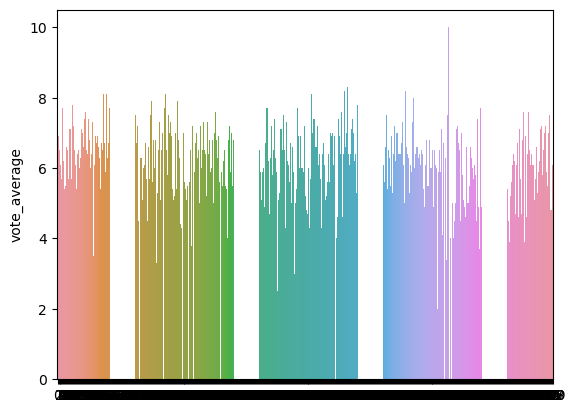

In [4]:
print(data['vote_average'],data['vote_count'])
import seaborn as sns

sns.barplot(data[:500],x=data[:500].index,y=data[:500]['vote_average'])



<Axes: ylabel='vote_count'>

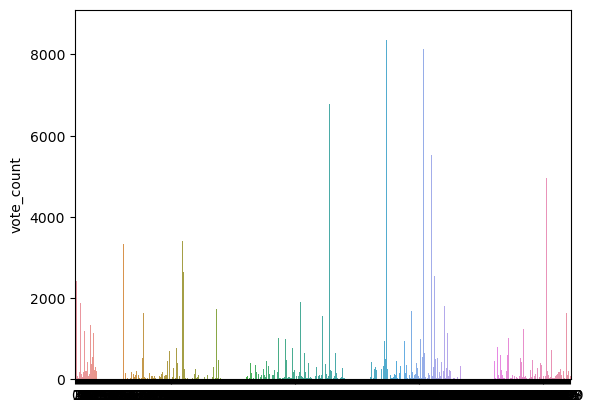

In [5]:
sns.barplot(data[:500],x=data[:500].index,y=data[:500]['vote_count'])

In [6]:
print(data['vote_count'].describe())

count    45460.000000
mean       109.897338
std        491.310374
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64


위의 시각화 및 통계값 분석 데이터를 보면 극단적으로 일부 데이터가 많은 투표를 받았음을 볼 수 있다.   
하지만 별점은 많은 사람이 투표할 수록 극단적으로 높기 어렵다.   
이런 불공정한 부분을 해결해야한다.    
이를 해결하기 위해서 imdb에서는 weighted rating(WR)을 제안한다.    
$$WR = (\frac{v}{v+m})*R+(\frac{m}{v+m})*C$$    
이다.    
- r:개별 영화 평점
- v:개별영화에 평점을 투표한 횟수(vote_count)
- m: 250위 안에 들어야 하는 최소한의 투표 수 (임의로 정해도된다.)
- c: 전체 영화에 대한 평균평점    

하지만 번거롭기 때문에 나는 1000표 이상 받았으면 어느정도 받았다고 치고 1000표 이상인 데이터만 가지고 진행할 예정이다.

In [7]:
new_data = data.query("vote_count > 1000")
print(new_data)

          budget                                     genres  \
0       30000000                    Animation Comedy Family   
1       65000000                   Adventure Fantasy Family   
5       60000000                Action Crime Drama Thriller   
9       58000000                  Adventure Action Thriller   
15      52000000                                Drama Crime   
...          ...                                        ...   
43644   34000000                               Action Crime   
44009   80000000   Action Animation Adventure Family Comedy   
44274  152000000                  Drama Science Fiction War   
44678  100000000          Action Drama History Thriller War   
44842  260000000  Action Science Fiction Thriller Adventure   

                                                homepage      id  \
0                   http://toystory.disney.com/toy-story     862   
1                                                    NaN    8844   
5                                      

In [8]:
print(new_data['vote_count'].min()) #1000표 이상인 영화 데이터만 뽑힌 것을 확인할 수 있다. 

1005.0


### 콘텐츠 기반 필터링 추천(Content based filtering)
콘텐츠 기반으로 추천을 하고자 한다. 비슷한 콘텐츠가 어떤게 있는지를 찾아서 사용자에게 추천하는 것을 말한다.   
비슷한 콘텐츠는 뭐가 있을까? -> 장르가 될 수 있다.    
또한 나중에 자연어 모델을 사용해서 overview를 요약하게 되면 이 부분도 비슷한 콘텐츠가 될 수 있다.    
우선 장르를 가지고 콘텐츠 기반 추천을 하도록 하자. 현재 장르는 문자열로 되어있다. 비슷한지 아닌지 확인하려면 이를 벡터화 시켜야한다.

In [12]:
#장르 -> TF-IDF 벡터화
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data['genres']).toarray()
print(tfidf_matrix)
tfidf_matrix_feat = tfidf.get_feature_names_out()
print(tfidf_matrix_feat)

[[0.         0.         0.68601997 ... 0.         0.         0.        ]
 [0.         0.54393878 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.66164348 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
['action' 'adventure' 'animation' 'aniplex' 'brosta' 'carousel' 'cartel'
 'comedy' 'committee' 'crime' 'documentary' 'drama' 'entertainment'
 'family' 'fantasy' 'fiction' 'film' 'filmworks' 'foreign' 'gohands'
 'group' 'history' 'horror' 'mardock' 'media' 'movie' 'music' 'mystery'
 'odyssey' 'production' 'productions' 'pulser' 'rogue' 'romance' 'science'
 'scramble' 'sentai' 'state' 'telescene' 'the' 'thriller' 'tv' 'view'
 'vision' 'war' 'western']


In [13]:
tfidf_df = pd.DataFrame(tfidf_matrix,columns=tfidf_matrix_feat,index=data['title'])

In [14]:
print(tfidf_df.head()) #각 타이틀 별 장르가 얼마나 비중을 차지하는지 보여준다. 

                             action  adventure  animation  aniplex  brosta  \
title                                                                        
Toy Story                       0.0   0.000000    0.68602      0.0     0.0   
Jumanji                         0.0   0.543939    0.00000      0.0     0.0   
Grumpier Old Men                0.0   0.000000    0.00000      0.0     0.0   
Waiting to Exhale               0.0   0.000000    0.00000      0.0     0.0   
Father of the Bride Part II     0.0   0.000000    0.00000      0.0     0.0   

                             carousel  cartel    comedy  committee  crime  \
title                                                                       
Toy Story                         0.0     0.0  0.369398        0.0    0.0   
Jumanji                           0.0     0.0  0.000000        0.0    0.0   
Grumpier Old Men                  0.0     0.0  0.609705        0.0    0.0   
Waiting to Exhale                 0.0     0.0  0.546955        0.0  

In [16]:
cos_sim = cosine_similarity(tfidf_df)
print(cos_sim)

[[1.         0.36321448 0.2252239  ... 0.         0.         0.        ]
 [0.36321448 1.         0.         ... 0.         0.         0.        ]
 [0.2252239  0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


위의 코드에서 각 영화별 장르 유사성을 띄는 행렬을 얻었다.    
이것을 데이터프레임으로 만들고 유사도가 가장 높은 topk 개의 타이틀을 출력하도록 해보자

In [21]:
sim_df = pd.DataFrame(cos_sim,columns=data['title'],index=data['title'])
print(sim_df.head())

title                        Toy Story   Jumanji  Grumpier Old Men  \
title                                                                
Toy Story                     1.000000  0.363214          0.225224   
Jumanji                       0.363214  1.000000          0.000000   
Grumpier Old Men              0.225224  0.000000          1.000000   
Waiting to Exhale             0.202044  0.000000          0.897082   
Father of the Bride Part II   0.369398  0.000000          0.609705   

title                        Waiting to Exhale  Father of the Bride Part II  \
title                                                                         
Toy Story                             0.202044                     0.369398   
Jumanji                               0.000000                     0.000000   
Grumpier Old Men                      0.897082                     0.609705   
Waiting to Exhale                     1.000000                     0.546955   
Father of the Bride Part II        

In [27]:
# 뭐가 유사한지 확인 
recom_df = sim_df.query('title == "Toy Story"')


In [43]:
top_k = recom_df.sort_values('Toy Story',axis=1,ascending=False).iloc[:,:1000]
print(top_k)


title      Toy Story  Open Season 3  Yellowbird  Animalympics  \
title                                                           
Toy Story        1.0            1.0         1.0           1.0   

title      Hoodwinked Too! Hood VS. Evil  Frankenweenie  Hotel Transylvania 2  \
title                                                                           
Toy Story                            1.0            1.0                   1.0   

title      The Prince and the Pauper  Mr. Bug Goes to Town  Happy Feet Two  \
title                                                                        
Toy Story                        1.0                   1.0             1.0   

title      ...  Daddy Day Care     Rufus  Nacho Libre  \
title      ...                                          
Toy Story  ...        0.727583  0.727583     0.727583   

title      The Adventures of Food Boy  \
title                                   
Toy Story                    0.727583   

title      Won Ton Ton: the D

위의 결과에서 Open Season 과 유사하다고 나오는데 Open Season은 곰돌이가 나오는 애니메이션이다. 그리고 뒤쪽으로 갈 수록 다른 영화들이 나온다.    
대부분 animation을 기준으로 나오는 것을 보면 animation은 장르에 끼치는 영향이 큰 것 같다.

In [55]:
recom_df = sim_df.query('title == "The Dark Knight Rises"') #다른 영화 확인

top_k = recom_df.sort_values('The Dark Knight Rises',axis=1,ascending=False).iloc[:,:150]
print(top_k.T)

title               The Dark Knight Rises
title                                    
Blast of Silence                      1.0
Murder by Contract                    1.0
Fulltime Killer                       1.0
The Anderson Tapes                    1.0
New Police Story                      1.0
...                                   ...
Original Gangstas                     1.0
Black's Game                          1.0
The Dark Knight                       1.0
The Immortals                         1.0
The Star Chamber                      1.0

[150 rows x 1 columns]


살짝 어두운 느낌의 영화들이 추천되는 것을 보면 어느정도 잘 예측하고 있다는 것을 나타낸다.